In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df =pd.read_csv("VNL2023.csv")


In [3]:
df.head(3)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP


# تحديد الارتباط بين columns

In [4]:
numrucal_col=df.select_dtypes(include=["int","float"]).columns
matix_col=df[numrucal_col].corr()

In [5]:
matix_col

,Age,Attack,Block,Serve,Set,Dig,Receive
Age,1.000000,-0.177849,-0.101040,-0.108367,0.177757,0.167141,-0.011067
Attack,-0.177849,1.000000,0.338412,0.768859,-0.430805,-0.098999,0.169892
Block,-0.101040,0.338412,1.000000,0.335954,-0.132019,-0.348347,-0.265206
Serve,-0.108367,0.768859,0.335954,1.000000,-0.154815,-0.052501,0.039642
Set,0.177757,-0.430805,-0.132019,-0.154815,1.000000,0.131659,-0.305869
Dig,0.167141,-0.098999,-0.348347,-0.052501,0.131659,1.000000,0.624733
Receive,-0.011067,0.169892,-0.265206,0.039642,-0.305869,0.624733,1.000000


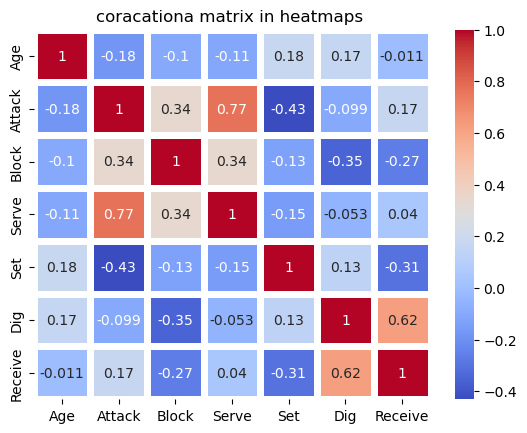

In [7]:
sns.heatmap(data=matix_col ,annot=True ,cmap="coolwarm",linewidths=5)
plt.title("coracationa matrix in heatmaps ")
plt.show()

<Axes: ylabel='count'>

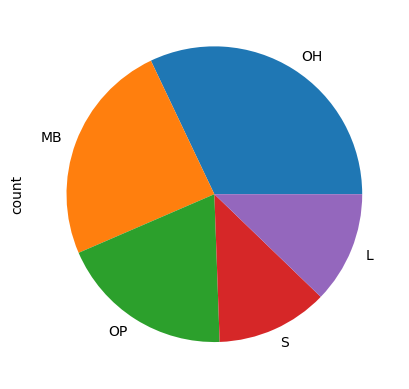

In [11]:
Position_count=df.Position.value_counts()
Position_count.plot(kind="pie")

# عمل مخطط داءري يقوم بشرح القيم و position , 

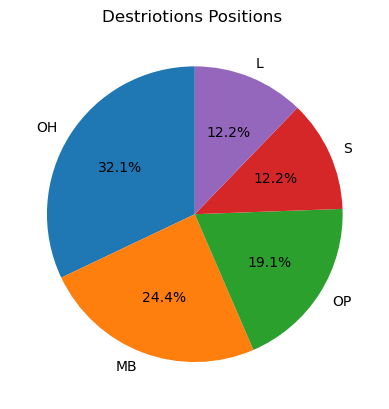

In [14]:
plt.pie(Position_count ,labels=Position_count.index ,autopct="%1.1f%%",startangle=90)
plt.title("Destriotions Positions ")
plt.show()

# متوسط المهاجمين من كل دوله 

In [19]:
avr_Attack_by_Country=df.groupby("Country")['Attack'].mean().sort_values(ascending=False)
avr_Attack_by_Country

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

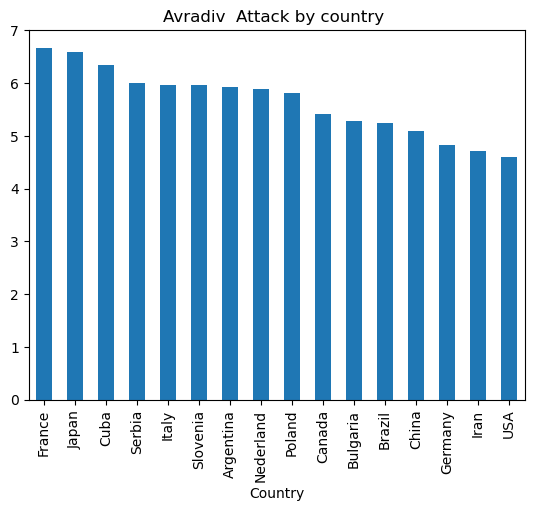

In [ ]:
avr_Attack_by_Country.plot(kind="bar")
plt.title("Avradive Attack by country ")
plt.show()

In [ ]:
avr_Age_Server=df.groupby("Age")["Serve"].mean().sort_values(ascending=False)

In [ ]:
avr_Age_Server 

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [34]:
df.groupby(["Country","Position"])["Attack"].mean().reset_index().sort_values(ascending=False,by="Attack").head(20)

,Country,Position,Attack
28,Cuba,OP,15.000000
52,Japan,OH,13.665000
8,Brazil,OP,12.460000
68,Serbia,OP,12.330000
48,Italy,OP,12.330000
58,Nederland,OP,10.540000
2,Argentina,OH,10.120000
33,France,OP,9.713333
27,Cuba,OH,9.705000
12,Bulgaria,OH,9.500000


# حساب قيمه dug لكل بلد 

In [35]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

In [38]:
df.groupby("Country")["Dig"].sum().sort_values(ascending=False)

Country
France       38.59
Italy        35.89
Argentina    33.88
Slovenia     33.85
Poland       32.56
Japan        32.38
Serbia       30.64
USA          28.42
Canada       26.50
Brazil       24.61
Iran         24.25
Bulgaria     22.45
China        22.08
Nederland    21.84
Germany      20.92
Cuba         20.26
Name: Dig, dtype: float64

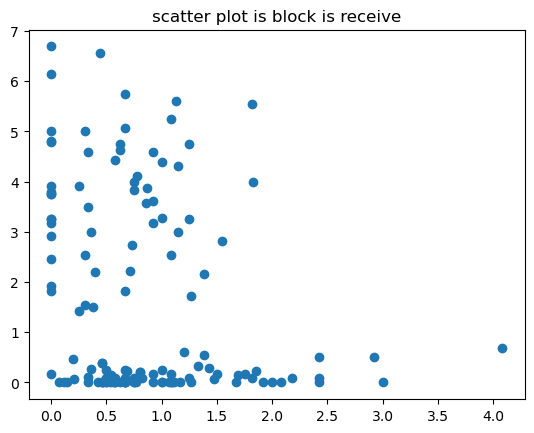

In [40]:
plt.scatter(df["Block"], df["Receive"])
plt.title("scatter plot is block is receive")
plt.show()

# انشاء مخطط صندوقي يحتوي علي قيم Serve

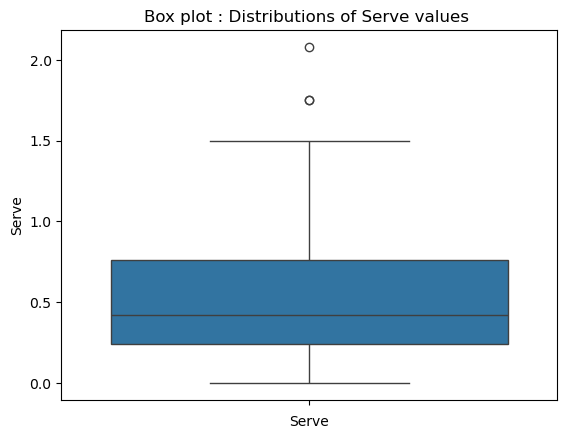

In [44]:
sns.boxplot(df['Serve'])
plt.title("Box plot : Distributions of Serve values ")
plt.xlabel("Serve")
plt.show()

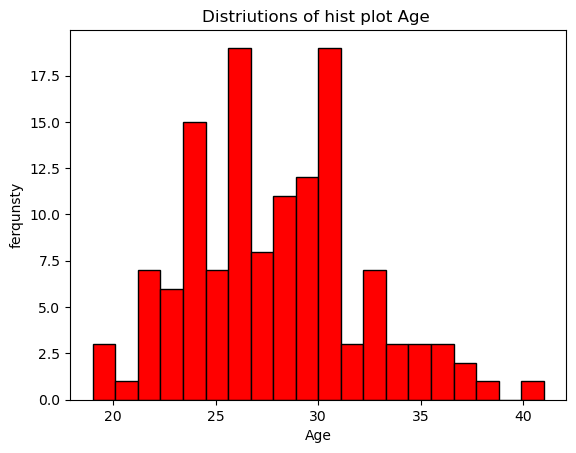

In [ ]:
f

# عرض المراكز و متواسك الهجوم في كل مركز 

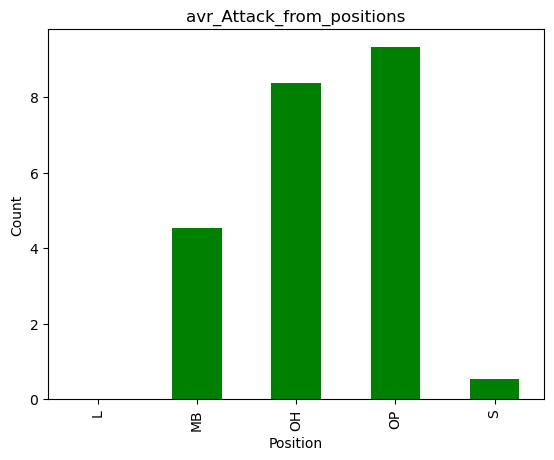

In [59]:
avr_Attack_By_positions=df.groupby("Position")["Attack"].mean().plot(kind="bar",color="green")
plt.title("avr_Attack_from_positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.show()

# ارسم علاقه خطيه بين Age , server 

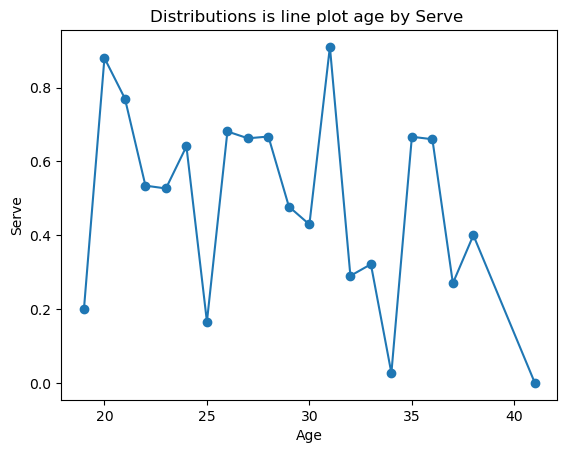

In [70]:
df.groupby("Age")["Serve"].mean().plot(kind='line',marker="o",linestyle="-")
plt.title("Distributions is line plot age by Serve ")
plt.xlabel("Age")
plt.ylabel("Serve")
plt.show()


In [78]:
total_Attack_block_country=df.groupby("Country")[["Attack","Block"]].sum()
total_Attack_block_country

,Attack,Block
Country,,
Argentina,47.40,8.48
Brazil,42.00,6.30
Bulgaria,42.26,5.96
Canada,37.84,5.08
China,40.75,5.66
Cuba,44.41,6.76
France,66.70,9.08
Germany,38.67,5.04
Iran,42.37,8.39


<Axes: xlabel='Country'>

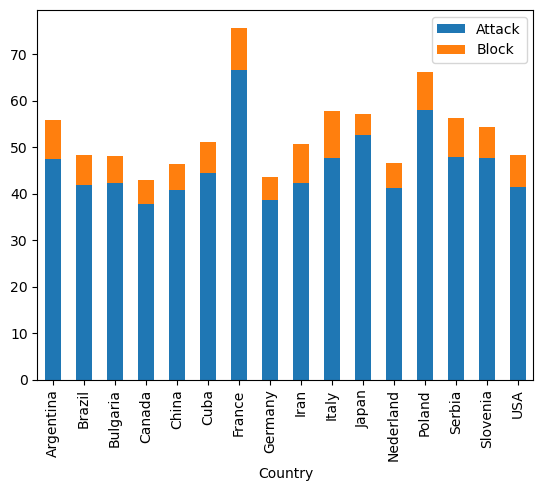

In [82]:
total_Attack_block_country.plot(kind='bar',stacked=True)